In [333]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = "../data/rawdata/winemag-data-130K-v2.csv"
df_one = pd.read_csv(df,index_col=0)
df_2 = df_one.dropna(subset=['points', 'price', 'country'])
df_2.shape

(120916, 13)

In [334]:
df_2.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [193]:
df_2.describe()

,points,price
count,120916.000000,120916.000000
mean,88.421723,35.368644
std,3.044942,41.031052
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [355]:
df_2["variety"].value_counts(10)

Red Wine                     0.532531
White Wine                   0.292280
Rosé                         0.026969
Sparkling Blen               0.016764
Champagne                    0.010015
Glera                        0.004995
Sangiovese Grosso            0.004871
White White                  0.003192
Nero d'Avola                 0.002696
Meritage                     0.002142
Melon                        0.001993
Vermentino                   0.001712
Blaufränkisch                0.001704
Primitivo                    0.001679
Montepulciano                0.001662
Prosecco                     0.001662
Zweigelt                     0.001505
G-S-M                        0.001489
Touriga Nacional             0.001431
Mencía                       0.001431
Dolcetto                     0.001389
Tannat                       0.001381
Roussanne                    0.001381
Tinta de Toro                0.001365
Verdicchio                   0.001332
Pinot Nero                   0.001315
Monastrell  

In [337]:
bins_rating= [80,85,90,95,100]
wine_rating = ["80-84", "85 to 89", "90 to 94", "100"]


In [347]:
df_2["Rating"]= pd.cut(df_2["points"], bins_rating, labels= wine_rating, right=False)

df_2["variety"] = df_2["variety"].replace(
    {"Pinot Noir": "Red Wine", "Cabernet Sauvignon": "Red Wine", "Red Blend": "Red Wine", "Bordeaux-style Red Blend": "Red Wine", "Syrah": "Red Wine", "Merlot": "Red Wine", 'Zinfandel': "Red Wine", 
     'Malbec': "Red Wine", 'Nebbiolo': "Red Wine", 'Portuguese Red': 'Red Wine' , 'Tempranillo': 'Red Wine', 'Rhône-style Red Blend': 'Red Wine', 'Cabernet Franc': 'Red Wine', 'Gamay': 'Red Wine', 'Shiraz': 'Red Wine','Petite Sirah': 'Red Wine', 
    'Chardonnay': 'White Wine', 'Sauvignon Blanc': 'White Wine', 'Riesling': 'White Wine','Sangiovese': 'White Wine', 'White Blend': 'White Wine','Pinot Gris': 'White Wine', 'Grüner Veltliner': 'White Wine', 'Pinot Grigio': 'White Wine', 'Portuguese White': 'White Wine', 'Viognier': 'White Wine','Gewürztraminer': 'White Wine',
     'Bordeaux-style White Blend': 'White Wine', 'Grenache': 'Red Wine', 'Barbera': 'Red Wine', 'Sangiovese Gross': 'Red Wine', 'Tempranillo Blend': 'Red Wine', 'Carmenère': 'Red Wine', 'Chenin Blanc': 'White Wine', 'Port': 'Red Wine', 
     'Garganega': 'White Wine', 'Mourvèdre': 'Red Wine','Torrontés': 'White Wine', 'Petit Verdot': 'Red Wine','Verdejo': 'White Wine', 'Aglianico': 'Red Wine','Sauvignon': 'White Wine', 'Garnacha': 'Red Wine', 'Nero d Avola': 'Red Wine', 'Moscato': 'White Wine', 'Albariño': 'White Wine','Rhône-style White Blend': 'White Wine', 'Pinot Blanc': 'White White', 'Corvina, Rondinella, Molinara': 'Red Wine', 'Sparkling Blend': 'Sparkling Blen', 'Rose': 'Rose', 'Champagne Blend': 'Champagne'})
df_2.head()




C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mwhaw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Rating
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Red Wine,Quinta dos Avidagos,85 to 89
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),White Wine,Rainstorm,85 to 89
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,White Wine,St. Julian,85 to 89
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Red Wine,Sweet Cheeks,85 to 89
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,85 to 89


In [ ]:
red_wine = df_2[df_2["variety"] == "Red Wine"].groupby([df_2["price"]])
red_wine_count = red_wine["variety"].count()
df_red = red_wine_count.sum()

white_wine = df_2[df_2["variety"] == "White Wine"].groupby([df_2["price"]])
white_wine_count = white_wine["variety"].count()
df_white = white_wine_count.sum()

sparkling_wine = df_2[df_2["variety"] == "Sparkling Blen"].groupby([df_2["price"]])
sparkling_wine_count = sparkling_wine["variety"].count()
df_sparkling = sparkling_wine_count.sum()

Rose_wine = df_2[df_2["variety"] == "Prosecco"].groupby([df_2["price"]])
Rose_wine_count = Rose_wine["variety"].count()
df_rose = Rose_wine_count.sum()

Champagne_wine = df_2[df_2["variety"]== "Champagne"].groupby([df_2["price"]])

Champagne_wine_count = Champagne_wine["variety"].count()
df_champagne = Champagne_wine_count.sum()

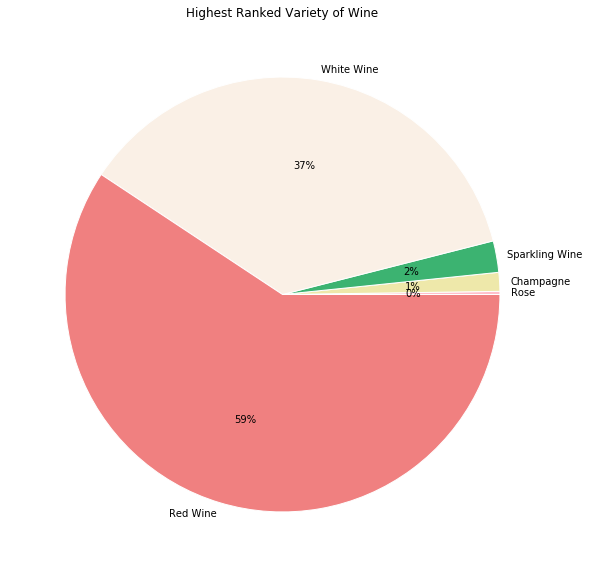

In [359]:
sizes = sorted(sizes)

labels = 'Rose','Champagne', 'Sparkling Wine', 'White Wine', 'Red Wine'
colors = [ 'Pink','palegoldenrod', 'mediumseagreen', 'linen', 'lightcoral']

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

pie_wedge_collection = ax.pie(sizes, colors=colors, labels=labels, autopct="%1.00f%%",labeldistance=1.05);

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Highest Ranked Variety of Wine");



In [300]:
#determine which variety has the highest points
df_taster_points = df_2.groupby(["taster_name"]).mean()
df_taster_points = df_taster_points.reset_index()
df_taster_points.head()


,taster_name,points,price
0,Alexander Peartree,85.854722,29.053269
1,Anna Lee C. Iijima,88.405127,29.790112
2,Anne Krebiehl MW,90.612570,31.244910
3,Carrie Dykes,86.384058,30.753623
4,Christina Pickard,87.833333,29.333333


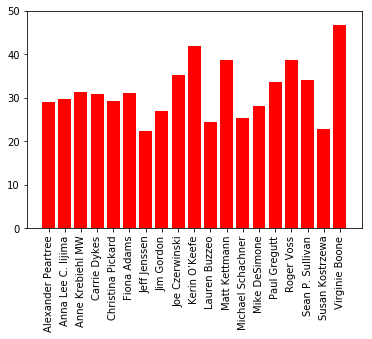

In [136]:
plt.bar(df_taster_points["taster_name"], df_taster_points["price"], color='r')
plt.ylim([0, 50])
plt.xticks(rotation=90)
plt.show()

In [306]:
df_variety = df_2.groupby(["country"]).mean()
df_variety = df_variety.reset_index()
df_variety.head()


,country,points,price
0,Argentina,86.710330,24.510117
1,Armenia,87.500000,14.500000
2,Australia,88.595466,35.437663
3,Austria,90.190782,30.762772
4,Bosnia and Herzegovina,86.500000,12.500000


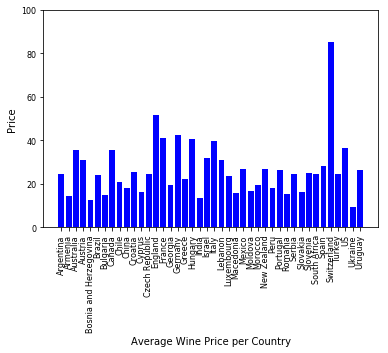

In [366]:
plt.bar(df_variety["country"], df_variety["price"], color='b')
plt.ylim([0, 100])
plt.xticks(rotation=75, fontsize=5)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xticks(rotation=90)
plt.xlabel("Average Wine Price per Country")
plt.ylabel("Price")
 
plt.show()

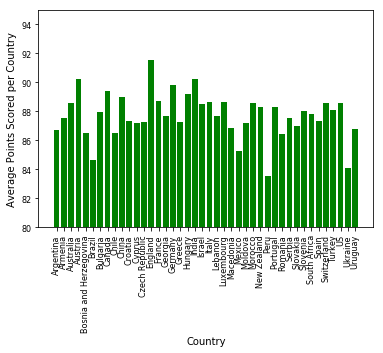

In [365]:
plt.bar(df_variety["country"], df_variety["points"], color='g')
plt.ylim([80, 95])
plt.xticks(rotation=75, fontsize=5)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Points Scored per Country")
 
plt.show()